In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validate
#from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Processing the data

col_names = ['ID','Name','Sex','Age','Height','Weight','Team','NOC', 'Games','Year','Season','City','Sport','Event','Medal','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3','Ath_Cnt']

df = pd.read_csv('athletes_Medal_Type.csv', usecols=col_names)

df['Medal'].fillna(0, inplace=True)
df = df.replace({'Medal': {'Gold': 3, 'Silver': 2, 'Bronze': 1}})
df = df.dropna(axis=0)
#print (df.shape)
#print (df)

# Storing numeric values after enumeration in python dictionary to be referenced later for testing on new data

NOC_Map = {}

for i, j in enumerate(np.unique(df['NOC'])):
    NOC_Map[j] = i

Sport_Map = {}

for i, j in enumerate(np.unique(df['Sport'])):
    Sport_Map[j] = i

Event_Map = {}

for i, j in enumerate(np.unique(df['Event'])):
    Event_Map[j] = i

#print (Sport_Map)

In [13]:
# Converting strings to int using enumerate() function
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['NOC']))}
class_mapping
df['NOC'] = df['NOC'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['City']))}
class_mapping
df['City'] = df['City'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Name']))}
class_mapping
df['Name'] = df['Name'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Team']))}
class_mapping
df['Team'] = df['Team'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Games']))}
class_mapping
df['Games'] = df['Games'].map(class_mapping)
df

'''class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Season']))}
class_mapping
df['Season'] = df['Season'].map(class_mapping)
df'''

'''class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Sex']))}
class_mapping
df['Sex'] = df['Sex'].map(class_mapping)
df'''

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Sport']))}
class_mapping
df['Sport'] = df['Sport'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Event']))}
class_mapping
df['Event'] = df['Event'].map(class_mapping)
df



col_names = ['Name','Sex','Age','Height','Weight','Team','NOC', 'Games','Year','Season','City','Sport','Event','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3']
col_names1 = ['Sex','Name','Age','Height','Weight','NOC','Year','Season','Sport','Event','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3']

col_names2 = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3','Ath_Cnt']

col_names3 = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-1','1992-2016-2','1992-2016-3']

# One hot encoding the categorical variables
#print (df)
X = df[col_names2].values 
color_le = LabelEncoder() 
X[:, 0] = color_le.fit_transform(X[:, 0])
X
X[:, 6] = color_le.fit_transform(X[:, 6])
X
#print (X)
ohe = OneHotEncoder(categorical_features=[0,6])
ohe.fit_transform(X).toarray()
#df = DataFrame(pd.get_dummies(df[col_names]))
pd.get_dummies(df[col_names2])

X = pd.get_dummies(df[col_names2]).as_matrix()

y = pd.get_dummies(df['Medal']).as_matrix()
#y = df['Medal'].values
#print (y.shape)
#print (y)
#X = df[].values 
#print (df)
#print (X.shape[1])
#print (X.shape)
#print (X)




C:\Users\Prashamsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Prashamsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Prashamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Method .as_matrix wi

In [14]:
#Converting data to PCA and then to scalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=50)

pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.transform(X)

stdscaler = preprocessing.StandardScaler().fit(X_train_pca)
X_train_scaled = stdscaler.transform(X_train_pca)
X_test_scaled  = stdscaler.transform(X_test_pca)

In [15]:
#Training feed forward neural networking model
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD
NN_model = Sequential()


# The Input Layer :

NN_model.add(Dense(100, input_dim = 24, activation='relu'))



# The Hidden Layers :

NN_model.add(Dense(200, activation='relu'))
NN_model.add(Dense(50, activation='relu'))

NN_model.add(Dense(15, activation='relu'))

NN_model.add(Dense(4, activation='softmax'))



# Compile the network :
#sgd = SGD(lr=0.005)

NN_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               2500      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_9 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 64        
Total params: 33,579
Trainable params: 33,579
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Defining model fit parameters
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=0, mode='auto')

checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=0, save_best_only=True)

In [17]:
#Fitting the model
history = NN_model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test), batch_size = 128, callbacks=[monitor, checkpointer], verbose=0, epochs=100)
NN_model.load_weights('best_weights.hdf5')

In [18]:
#Plotting confusion matrix and classificaiton report
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
pred=NN_model.predict(X_test_scaled)
pred = np.argmax(pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

#y_test2 = y_test2.replace({3: 'Gold', 2:'Silver', 1: 'Bronze', 0: 'None'})
#print (y_test2)

y_test2 = np.where(y_test2==0, 'None', y_test2)
y_test2 = np.where(y_test2=='1', 'Bronze', y_test2)
y_test2 = np.where(y_test2=='2', 'Silver', y_test2)
y_test2 = np.where(y_test2=='3', 'Gold', y_test2)

pred = np.where(pred==0, 'None', pred)
pred = np.where(pred=='1', 'Bronze', pred)
pred = np.where(pred=='2', 'Silver', pred)
pred = np.where(pred=='3', 'Gold', pred)


#y_test2 = lookup[y_test2]
#pred = lookup[pred]

cm = confusion_matrix(y_test2, pred)
np.set_printoptions(precision=2)
print ('Confusion_matrix')
print (cm)


#plt.figure()
print (classification_report(y_test2,pred))
#print (pred[:1000])
print (X_test_scaled.shape)
print (pred.shape)



Confusion_matrix
[[  500    55   676    68]
 [   40   685   548    85]
 [  152   134 22706   174]
 [   50    55   560   580]]
              precision    recall  f1-score   support

      Bronze       0.67      0.38      0.49      1299
        Gold       0.74      0.50      0.60      1358
        None       0.93      0.98      0.95     23166
      Silver       0.64      0.47      0.54      1245

   micro avg       0.90      0.90      0.90     27068
   macro avg       0.74      0.58      0.65     27068
weighted avg       0.89      0.90      0.89     27068

(27068, 24)
(27068,)


C:\Users\Prashamsh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


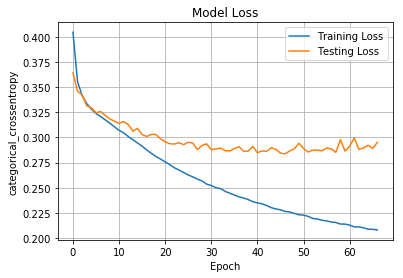

Loss after final iteration:  0.29495812329342963


In [19]:
#Calculating loss and plotting loss function
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,4))
xc = range(200)
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.grid('True')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

plt.show()
print ("Loss after final iteration: ", history.history['val_loss'][-1])

Accuracy after final iteration:  0.9042042263311316


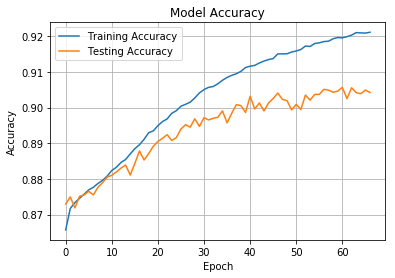

In [20]:
#Calculating accuracy and plotting it
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,4))
xc = range(200)
# # summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid('True')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper left')
print ("Accuracy after final iteration: ", history.history['val_acc'][-1])
plt.show()

In [21]:
#Testing on new data
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

col_names_test = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']

df1 = pd.read_csv('athletes_Medpred_test.csv', usecols = col_names_test)

col_names_test4 = ['NOC','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3']
df2 = pd.read_csv('athletes_year_percent.csv', usecols = col_names_test4)

col_names_test5 = ['NOC','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non']

df3 = pd.read_csv('athletes_country_event_med.csv', usecols = col_names_test5)

col_names_test6 = ['NOC','Year','Ath_Cnt']

df4 = pd.read_csv('athletes_cntyesno.csv', usecols = col_names_test6)


for i in range(len(df1)):
    for j in range(len(df2)):
        if df2.iloc[j,0] == df1.iloc[i,4]:
            df1.iloc[i,13] = df2.iloc[j,1]
            df1.iloc[i,14] = df2.iloc[j,2]
            df1.iloc[i,15] = df2.iloc[j,3]
            df1.iloc[i,16] = df2.iloc[j,4]
            df1.iloc[i,17] = df2.iloc[j,5]
            df1.iloc[i,18] = df2.iloc[j,6]
            df1.iloc[i,19] = df2.iloc[j,7]
            df1.iloc[i,20] = df2.iloc[j,8]
            df1.iloc[i,21] = df2.iloc[j,9]
            df1.iloc[i,22] = df2.iloc[j,10]
            df1.iloc[i,23] = df2.iloc[j,11]
            df1.iloc[i,24] = df2.iloc[j,12]
            df1.iloc[i,25] = df2.iloc[j,13]
            df1.iloc[i,26] = df2.iloc[j,14]
            df1.iloc[i,27] = df2.iloc[j,15]
            df1.iloc[i,28] = df2.iloc[j,16]
            j = len(df2)
    for k in range(len(df3)):
        if (df3.iloc[k,0] == df1.iloc[i,4] and df3.iloc[k,1] == df1.iloc[i,8]):
            df1.iloc[i,9] = df3.iloc[k,2]
            df1.iloc[i,10] = df3.iloc[k,3]
            df1.iloc[i,11] = df3.iloc[k,4]
            df1.iloc[i,12] = df3.iloc[k,5]
            k = len(df3)
    if df1.iloc[i,5] > 2016:
        pass
    else:
        for l in range(len(df4)):            
            if (df4.iloc[l,0] == df1.iloc[i,4] and df4.iloc[l,1] == df1.iloc[i,5]):
                df1.iloc[i,29] = df4.iloc[l,2]
                l = len(df4)

#print (df1)

for z in range(len(df1)):
    df1.iloc[z,4] = NOC_Map[df1.iloc[z,4]]
    df1.iloc[z,7] = Sport_Map[df1.iloc[z,7]]
    df1.iloc[z,8] = Event_Map[df1.iloc[z,8]]
    if df1.iloc[z,0] == 'M':
        df1.iloc[z,30] = 0
        df1.iloc[z,31] = 1
    else:
        df1.iloc[z,31] = 0
        df1.iloc[z,30] = 1
        
    if df1.iloc[z,6] == 'Winter':
        df1.iloc[z,32] = 0
        df1.iloc[z,33] = 1
    else:
        df1.iloc[z,33] = 0
        df1.iloc[z,32] = 1

col_names_test1 = ['Age','Height','Weight','NOC','Year','Sport','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']
        
#df2 = df1[col_names_test1].values
#print (df2)
#print (df1)



X1 = df1[col_names_test1].values
print (X1.shape)

stdscaler = preprocessing.StandardScaler().fit(X_train_pca)
#X1_train_scaled = stdscaler.transform(X1_train)

X1 = pca.transform(X1)
X1 = stdscaler.transform(X1)


pred_test=NN_model.predict(X1)
pred_test = np.argmax(pred_test, axis=1)

#print (X1)
#print (X1.shape)
#print (pred_test.shape)
print (pred_test)
print (pred_test.shape)
print (df1.shape)
#print (df1)



(1, 32)
[0]
(1,)
(1, 34)


In [23]:
#Testing on new data using Jupyter notebook UI widgets
import ipywidgets as widgets
from IPython.display import display
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from IPython.display import clear_output
import sys
import time

col_names_test = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']

df1 = pd.read_csv('UIathletes_Medpred_test.csv', usecols = col_names_test)

col_names_test4 = ['NOC','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3']
df2 = pd.read_csv('athletes_year_percent.csv', usecols = col_names_test4)

col_names_test5 = ['NOC','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non']

df3 = pd.read_csv('athletes_country_event_med.csv', usecols = col_names_test5)

col_names_test6 = ['NOC','Year','Ath_Cnt']

df4 = pd.read_csv('athletes_cntyesno.csv', usecols = col_names_test6)




'''def any_function_returning_value(word1,word2, word3):
    #new_word = 'Combining words is easy: %s %s %s'%(word1,word2, word3)
    print(new_word)
    print (df2.iloc[54,3])
    return new_word'''

class learn_classes_and_widgets():
    def __init__(self, param1='', param2='', param3='', param4='', param5='', param6='', param7='', param8='', param9='',param10=''):
        self.p1_text = widgets.Text(description = 'Sex M\F',value = param1)
        self.p2_text = widgets.Text(description = 'Age in years',value = param2)
        self.p3_text = widgets.Text(description = 'Height in cm',value = param3)
        self.p4_text = widgets.Text(description = 'Weight in Kgs',value = param4)
        self.p5_text = widgets.Text(description = 'Country Abbr',value = param5)
        self.p6_text = widgets.Text(description = 'Year',value = param6)
        self.p7_text = widgets.Text(description = 'Season Summer\Winter',value = param7)
        self.p8_text = widgets.Text(description = 'Sport',value = param8)
        self.p9_text = widgets.Text(description = 'Event',value = param9)
        self.p10_text = widgets.Text(description = 'Athl_Count',value = param10)
        self.p_button = widgets.Button(description="Get Medal Prediction", value= param1)
        self.p_button.on_click(self.handle_submit)
        display(self.p1_text, self.p2_text, self.p3_text, self.p4_text, self.p5_text, self.p6_text,self.p7_text, self.p8_text, self.p9_text,self.p10_text,self.p_button)
        
    def handle_submit(self, text):
        #clear_output()
        #handle_submit()
        #sys.stdout.write("\033[K") #clear line
        #sys.stdout.write("\033[F") #back to previous line
        
        count = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        if (self.p1_text.value == '' or self.p2_text.value == '' or self.p3_text.value == '' or self.p4_text.value == '' or self.p5_text.value == '' or self.p6_text.value == '' or self.p7_text.value == '' or self.p8_text.value == ''):
            print ('One or More inputs missing')
            return 'Please input your values'
        #print("Submitting")
        #age= int(self.p1_text_value);
        #print(int(self.p1_text.value) + int(self.p2_text.value) + int(self.p3_text.value))
        
        df1.iloc[0,0] = str(self.p1_text.value)
        df1.iloc[0,1] = int(self.p2_text.value)
        df1.iloc[0,2] = int(self.p3_text.value)
        df1.iloc[0,3] = int(self.p4_text.value)
        df1.iloc[0,4] = str(self.p5_text.value)
        df1.iloc[0,5] = int(self.p6_text.value)
        df1.iloc[0,6] = str(self.p7_text.value)
        df1.iloc[0,7] = str(self.p8_text.value)
        df1.iloc[0,8] = str(self.p9_text.value)
        

        for j in range(len(df2)):
            if df2.iloc[j,0] == df1.iloc[0,4]:
                count = 1
                df1.iloc[0,13] = df2.iloc[j,1]
                df1.iloc[0,14] = df2.iloc[j,2]
                df1.iloc[0,15] = df2.iloc[j,3]
                df1.iloc[0,16] = df2.iloc[j,4]
                df1.iloc[0,17] = df2.iloc[j,5]
                df1.iloc[0,18] = df2.iloc[j,6]
                df1.iloc[0,19] = df2.iloc[j,7]
                df1.iloc[0,20] = df2.iloc[j,8]
                df1.iloc[0,21] = df2.iloc[j,9]
                df1.iloc[0,22] = df2.iloc[j,10]
                df1.iloc[0,23] = df2.iloc[j,11]
                df1.iloc[0,24] = df2.iloc[j,12]
                df1.iloc[0,25] = df2.iloc[j,13]
                df1.iloc[0,26] = df2.iloc[j,14]
                df1.iloc[0,27] = df2.iloc[j,15]
                df1.iloc[0,28] = df2.iloc[j,16]
                j = len(df2)
        for k in range(len(df3)):
                if (df3.iloc[k,0] == df1.iloc[0,4] and df3.iloc[k,1] == df1.iloc[0,8]):
                    df1.iloc[0,9] = df3.iloc[k,2]
                    df1.iloc[0,10] = df3.iloc[k,3]
                    df1.iloc[0,11] = df3.iloc[k,4]
                    df1.iloc[0,12] = df3.iloc[k,5]
                    k = len(df3)
                    count1 = 1
        if df1.iloc[0,5] > 2016:
            count2 = 1
            df1.iloc[0,29] = str(self.p10_text.value)
        else:
            for l in range(len(df4)):
                    if (df4.iloc[l,0] == df1.iloc[0,4] and df4.iloc[l,1] == df1.iloc[0,5]):
                        df1.iloc[0,29] = df4.iloc[l,2]
                        l = len(df4)
                        count2 = 1


        #print (df1)
        #print (NOC_Map[df1.iloc[0,4]])
           
        if count == 0:
            print ("Invalid Country Abbrevation")
            return 'Please input your values'
        elif count1 == 0:
            print ("Invalid Event Name")
            return 'Please input your values'
        elif count2 == 0:
            print ("Invalid Year")
            return 'Please input your values'


        df1.iloc[0,4] = NOC_Map[df1.iloc[0,4]]
        df1.iloc[0,7] = Sport_Map[df1.iloc[0,7]]
        df1.iloc[0,8] = Event_Map[df1.iloc[0,8]]
        if df1.iloc[0,0] == 'M':
            df1.iloc[0,30] = 0
            df1.iloc[0,31] = 1
            count3 = 1
        elif df1.iloc[0,0] == 'F':
            df1.iloc[0,31] = 0
            df1.iloc[0,30] = 1
            count3 = 1
       

        if df1.iloc[0,6] == 'Winter':
            df1.iloc[0,32] = 0
            df1.iloc[0,33] = 1
            count4 = 1
        elif df1.iloc[0,6] == 'Summer':
            df1.iloc[0,33] = 0
            df1.iloc[0,32] = 1
            count4 = 1
        
        if count3 == 0:
            print ("Invalid Gender")
            return 'Please input your values'
        if count4 == 0:
            print ("Invalid Season")
            return 'Please input your values'
       
        col_names_test1 = ['Age','Height','Weight','NOC','Year','Sport','Event','Gam_Med_Bro','Gam_Med_Sil','Gam_Med_Gol','Gam_Med_Non','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']
        
        #print (df1.iloc[0,4])
        #print (df1['NOC'])
        X1 = df1[col_names_test1].values
        #print (X1.shape)
        #print (X1)

        stdscaler = preprocessing.StandardScaler().fit(X_train_pca)
        #X1_train_scaled = stdscaler.transform(X1_train)

        X1 = pca.transform(X1)
        X1 = stdscaler.transform(X1)


        pred_test=NN_model.predict(X1)
        pred_test = np.argmax(pred_test, axis=1)

        #print (X1)
        #print (X1.shape)
        #print (pred_test.shape)

        if pred_test == 0:
                print ('The Athelete is predicted to win No Medal')
        if pred_test == 3:
                print ('The Athelete is predicted to win Gold')
        if pred_test == 2:
                print ('The Athelete is predicted to win Silver')
        if pred_test == 1:
                print ('The Athelete is predicted to win Bronze')
            #print (pred_test)
        
        #self.w = any_function_returning_value(self.p1_text.value,self.p2_text.value, self.p3_text.value)
        #return self.w

f = learn_classes_and_widgets(param1 = '')




Text(value='', description='Sex M\\F')

Text(value='', description='Age in years')

Text(value='', description='Height in cm')

Text(value='', description='Weight in Kgs')

Text(value='', description='Country Abbr')

Text(value='', description='Year')

Text(value='', description='Season Summer\\Winter')

Text(value='', description='Sport')

Text(value='', description='Event')

Text(value='', description='Athl_Count')

Button(description='Get Medal Prediction', style=ButtonStyle())